In [1]:
import random
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import numpy as np
import torch.utils.data
import cv2
import torchvision.models.segmentation
import torch
import os
batchSize=5
imageSize=[200,200]
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


In [2]:
#https://towardsdatascience.com/train-mask-rcnn-net-for-object-detection-in-60-lines-of-code-9b6bbff292c3


In [3]:
trainDir="final_dataset/"

imgs=[]
for pth in os.listdir(trainDir):
    imgs.append(trainDir+"/"+pth +"//")
imgs += imgs
print(imgs)


valDir="/home/madmax/Documents/SK_articles/to_git/valid_data/"
imgs_val=[]
for pth in os.listdir(valDir):
    imgs_val.append(valDir+"/"+pth +"//")


['final_dataset//295282608//', 'final_dataset//295280084//', 'final_dataset//295282746//', 'final_dataset//295279931//', 'final_dataset//295279941//', 'final_dataset//295282607//', 'final_dataset//295282671//', 'final_dataset//295280103//', 'final_dataset//295282538//', 'final_dataset//296610963//', 'final_dataset//295280130//', 'final_dataset//295282736//', 'final_dataset//295282361//', 'final_dataset//296616754//', 'final_dataset//295282837//', 'final_dataset//295282827//', 'final_dataset//295282777//', 'final_dataset//295493087//', 'final_dataset//295282387//', 'final_dataset//295282500//', 'final_dataset//295282499//', 'final_dataset//295280046//', 'final_dataset//295282721//', 'final_dataset//295282521//', 'final_dataset//295282555//', 'final_dataset//295280068//', 'final_dataset//295279815//', 'final_dataset//295279760//', 'final_dataset//295282720//', 'final_dataset//295282802//', 'final_dataset//295282773//', 'final_dataset//295282735//', 'final_dataset//295282544//', 'final_da

In [4]:
#random image in train set
def loadData__2():
  batch_Imgs=[]
  batch_Data=[]
 #fll 1
 #frl 2
 #bll 3
 #brl 4
  for i in range(batchSize):        
        num_objs = 0
        #idx=0
        idx=random.randint(0,len(imgs)-1)
        img = cv2.imread(os.path.join(imgs[idx], "original.png"))
        img = cv2.resize(img, imageSize, cv2.INTER_LINEAR)        
        masks=[]
        labels=[]
        maskDir=os.path.join(imgs[idx], "front_left_light")
        isExist = os.path.exists(maskDir)
        if (isExist):
          for mskName in os.listdir(maskDir):
            vesMask = cv2.imread(maskDir+'/'+mskName, 0)
            vesMask = (vesMask > 0).astype(np.uint8) 
            vesMask=cv2.resize(vesMask,imageSize,cv2.INTER_NEAREST)
            masks.append(vesMask)
            labels.append(1)
        
        maskDir=os.path.join(imgs[idx], "front_right_light")
        isExist = os.path.exists(maskDir)
        if (isExist):
          for mskName in os.listdir(maskDir):
            vesMask = cv2.imread(maskDir+'/'+mskName, 0)
            vesMask = (vesMask > 0).astype(np.uint8) 
            vesMask=cv2.resize(vesMask,imageSize,cv2.INTER_NEAREST)
            masks.append(vesMask)     
            labels.append(2)
        maskDir=os.path.join(imgs[idx], "back_left_light")
        isExist = os.path.exists(maskDir)
        if (isExist):
          for mskName in os.listdir(maskDir):
            vesMask = cv2.imread(maskDir+'/'+mskName, 0)
            vesMask = (vesMask > 0).astype(np.uint8) 
            vesMask=cv2.resize(vesMask,imageSize,cv2.INTER_NEAREST)
            masks.append(vesMask)     
            labels.append(3)
        maskDir=os.path.join(imgs[idx], "back_right_light")
        isExist = os.path.exists(maskDir)
        if (isExist):
          for mskName in os.listdir(maskDir):
            vesMask = cv2.imread(maskDir+'/'+mskName, 0)
            vesMask = (vesMask > 0).astype(np.uint8) 
            vesMask=cv2.resize(vesMask,imageSize,cv2.INTER_NEAREST)
            masks.append(vesMask)     
            labels.append(4)
            
        
        
        #all masks
        num_objs = len(masks)
        if num_objs==0: return loadData()        
        boxes = torch.zeros([num_objs,4], dtype=torch.float32)
        for i in range(num_objs):
            x,y,w,h = cv2.boundingRect(masks[i])
            boxes[i] = torch.tensor([x, y, x+w, y+h])
        masks = torch.as_tensor(masks, dtype=torch.uint8)
        img = torch.as_tensor(img, dtype=torch.float32)        
        #all data
        data = {}
        data["boxes"] =  boxes
        data["labels"] =  torch.as_tensor(labels, dtype=torch.int64)   
        #data["labels"] =  torch.ones((num_objs,), dtype=torch.int64)   
        data["masks"] = masks        
        batch_Imgs.append(img)
        batch_Data.append(data)  
  
  batch_Imgs=torch.stack([torch.as_tensor(d) for d in batch_Imgs],0)
  batch_Imgs = batch_Imgs.swapaxes(1, 3).swapaxes(2, 3)
  return batch_Imgs, batch_Data

In [5]:
#images in order
idx = 0
def loadData_ordered():
  global idx
  global imgs
  batch_Imgs=[]
  batch_Data=[]
 #fll 1
 #frl 2
 #bll 3
 #brl 4
  if (idx >= len(imgs)/2):
    idx = 0
  for i in range(batchSize):        
        num_objs = 0
        img = cv2.imread(os.path.join(imgs[idx], "original.png"))
        img = cv2.resize(img, imageSize, cv2.INTER_LINEAR)        
        masks=[]
        labels=[]
        maskDir=os.path.join(imgs[idx], "front_left_light")
        isExist = os.path.exists(maskDir)
        if (isExist):
          for mskName in os.listdir(maskDir):
            vesMask = cv2.imread(maskDir+'/'+mskName, 0)
            vesMask = (vesMask > 0).astype(np.uint8) 
            vesMask=cv2.resize(vesMask,imageSize,cv2.INTER_NEAREST)
            masks.append(vesMask)
            labels.append(1)
        
        maskDir=os.path.join(imgs[idx], "front_right_light")
        isExist = os.path.exists(maskDir)
        if (isExist):
          for mskName in os.listdir(maskDir):
            vesMask = cv2.imread(maskDir+'/'+mskName, 0)
            vesMask = (vesMask > 0).astype(np.uint8) 
            vesMask=cv2.resize(vesMask,imageSize,cv2.INTER_NEAREST)
            masks.append(vesMask)     
            labels.append(2)
        maskDir=os.path.join(imgs[idx], "back_left_light")
        isExist = os.path.exists(maskDir)
        if (isExist):
          for mskName in os.listdir(maskDir):
            vesMask = cv2.imread(maskDir+'/'+mskName, 0)
            vesMask = (vesMask > 0).astype(np.uint8) 
            vesMask=cv2.resize(vesMask,imageSize,cv2.INTER_NEAREST)
            masks.append(vesMask)     
            labels.append(3)
        maskDir=os.path.join(imgs[idx], "back_right_light")
        isExist = os.path.exists(maskDir)
        if (isExist):
          for mskName in os.listdir(maskDir):
            vesMask = cv2.imread(maskDir+'/'+mskName, 0)
            vesMask = (vesMask > 0).astype(np.uint8) 
            vesMask=cv2.resize(vesMask,imageSize,cv2.INTER_NEAREST)
            masks.append(vesMask)     
            labels.append(4)
        idx += 1   
            
        
        
        #all masks
        num_objs = len(masks)
        if num_objs==0: return loadData()        
        boxes = torch.zeros([num_objs,4], dtype=torch.float32)
        for i in range(num_objs):
            x,y,w,h = cv2.boundingRect(masks[i])
            boxes[i] = torch.tensor([x, y, x+w, y+h])
        masks = torch.as_tensor(masks, dtype=torch.uint8)
        img = torch.as_tensor(img, dtype=torch.float32)        
        #all data
        data = {}
        data["boxes"] =  boxes
        data["labels"] =  torch.as_tensor(labels, dtype=torch.int64)   
        #data["labels"] =  torch.ones((num_objs,), dtype=torch.int64)   
        data["masks"] = masks        
        batch_Imgs.append(img)
        batch_Data.append(data)  
  
  batch_Imgs=torch.stack([torch.as_tensor(d) for d in batch_Imgs],0)
  batch_Imgs = batch_Imgs.swapaxes(1, 3).swapaxes(2, 3)
  return batch_Imgs, batch_Data

In [6]:
#load image by id
def loadData_id(idx, imgs):
  batch_Imgs=[]
  batch_Data=[]
 #fll 1
 #frl 2
 #bll 3
 #brl 4
  for i in range(1):        
        num_objs = 0
        #idx=0
        #idx=random.randint(0,len(imgs)-1)
        img = cv2.imread(os.path.join(imgs[idx], "original.png"))
        img = cv2.resize(img, imageSize, cv2.INTER_LINEAR)        
        masks=[]
        labels=[]
        maskDir=os.path.join(imgs[idx], "front_left_light")
        isExist = os.path.exists(maskDir)
        if (isExist):
          for mskName in os.listdir(maskDir):
            vesMask = cv2.imread(maskDir+'/'+mskName, 0)
            vesMask = (vesMask > 0).astype(np.uint8) 
            vesMask=cv2.resize(vesMask,imageSize,cv2.INTER_NEAREST)
            masks.append(vesMask)
            labels.append(1)
        
        maskDir=os.path.join(imgs[idx], "front_right_light")
        isExist = os.path.exists(maskDir)
        if (isExist):
          for mskName in os.listdir(maskDir):
            vesMask = cv2.imread(maskDir+'/'+mskName, 0)*idx
            vesMask = (vesMask > 0).astype(np.uint8) 
            vesMask=cv2.resize(vesMask,imageSize,cv2.INTER_NEAREST)
            masks.append(vesMask)     
            labels.append(2)
        maskDir=os.path.join(imgs[idx], "back_left_light")
        isExist = os.path.exists(maskDir)
        if (isExist):
          for mskName in os.listdir(maskDir):
            vesMask = cv2.imread(maskDir+'/'+mskName, 0)
            vesMask = (vesMask > 0).astype(np.uint8) 
            vesMask=cv2.resize(vesMask,imageSize,cv2.INTER_NEAREST)
            masks.append(vesMask)     
            labels.append(3)
        maskDir=os.path.join(imgs[idx], "back_right_light")
        isExist = os.path.exists(maskDir)
        if (isExist):
          for mskName in os.listdir(maskDir):
            vesMask = cv2.imread(maskDir+'/'+mskName, 0)*idx
            vesMask = (vesMask > 0).astype(np.uint8) 
            vesMask=cv2.resize(vesMask,imageSize,cv2.INTER_NEAREST)
            masks.append(vesMask)     
            labels.append(4)
            
        
        
        #all masks
        num_objs = len(masks)
        if num_objs==0: return loadData()        
        boxes = torch.zeros([num_objs,4], dtype=torch.float32)
        for i in range(num_objs):
            x,y,w,h = cv2.boundingRect(masks[i])
            boxes[i] = torch.tensor([x, y, x+w, y+h])
        masks = torch.as_tensor(masks, dtype=torch.uint8)
        img = torch.as_tensor(img, dtype=torch.float32)        
        #all data
        data = {}
        data["boxes"] =  boxes
        data["labels"] =  torch.as_tensor(labels, dtype=torch.int64)   
        #data["labels"] =  torch.ones((num_objs,), dtype=torch.int64)   
        data["masks"] = masks        
        batch_Imgs.append(img)
        batch_Data.append(data)  
  
  batch_Imgs=torch.stack([torch.as_tensor(d) for d in batch_Imgs],0)
  batch_Imgs = batch_Imgs.swapaxes(1, 3).swapaxes(2, 3)
  return batch_Imgs, batch_Data

In [7]:
#count iou
import ignite

from collections import OrderedDict

import torch
from torch import nn, optim

from ignite.engine import *
from ignite.handlers import *
from ignite.metrics import *
from ignite.utils import *
from ignite.contrib.metrics.regression import *
from ignite.contrib.metrics import *

# create default evaluator for doctests

def eval_step(engine, batch):
    return batch

default_evaluator = Engine(eval_step)

def make_predicting_buf(pred, score, imageSize):
    result_predicting = [[0,0,0,0,0]] * imageSize[0] * imageSize[1]
    
    for i in range(len(pred[0]['masks'])):
        msk=pred[0]['masks'][i,0].detach().cpu().numpy()
        scr=pred[0]['scores'][i].detach().cpu().numpy()
        label = pred[0]['labels'][i].detach().cpu().numpy()
        if scr>score:  
            
            counter = 0
            for i1 in range(len(msk)):
                for j in range(len(msk[0])):
                  #print(msk[i1][j] )
                  if (msk[i1][j] > 0.5):
                    buf = [0,0,0,0,0]
                    buf[label] = 1
                    result_predicting[counter] = buf
                    
                  counter+=1
    ypred = torch.tensor(result_predicting)
    return (ypred)



def make_target_buf(targets, imageSize):
    result_targeting = [0] * imageSize[0] * imageSize[1]
    for i in range(len(targets[0]['masks'])):
            msk=targets[0]['masks'][i].detach().cpu().numpy()
            label = targets[0]['labels'][i].detach().cpu().numpy()
            counter = 0
            for i1 in range(len(msk)):
                    for j in range(len(msk[0])):
                      #print(msk[i1][j] )
                      if (msk[i1][j] > 0.5):
                        result_targeting[counter] = label

                      counter+=1
    ytrue = torch.tensor(result_targeting)
    return (ytrue)

def get_list_of_unique(yy_true):
    unique_list = [0,0,0,0,0]
    unique = set(yy_true.tolist())
    for i in unique:
        unique_list[i] = 1
    return unique_list

def count_iou_data (model, imgs):
    full_iou = True
    print('counting iou ...')
    list_of_unique = []
    if full_iou:
        out = 0
        for i in range(len(imgs)):
            #print(i)
            images, targets = loadData_id(i, imgs)
            images = list(image.to(device) for image in images)
            targets=[{k: v.to(device) for k,v in t.items()} for t in targets]
            pred = model(images)  
            yy_pred = make_predicting_buf(pred,0.5, imageSize)
            counter = 0
            yy_true = make_target_buf(targets, imageSize)
            cm = ConfusionMatrix(num_classes=5)
            metric = IoU(cm, ignore_index=0)
            metric.attach(default_evaluator, 'iou')
            state = default_evaluator.run([[ yy_pred, yy_true]])
            if (i==0):
                out = state.metrics['iou']
                list_of_unique = get_list_of_unique(yy_true)
            else: 
                out += state.metrics['iou']
                buf_list_of_unique = get_list_of_unique(yy_true)
                sum = []
                for value1, value2 in zip(list_of_unique, buf_list_of_unique):
                    sum.append(value1 + value2)
                list_of_unique = sum
            #print(state.metrics['iou'])
            #img = cv2.imread(os.path.join(imgs[i], "original.png"))
            #saver_predict_with_classes(img, model, path_out, 0.5, i)
        print("final IOU:    " )
        out_list = []
        for value1, value2 in zip(out.tolist(), list_of_unique):
                out_list.append(value1 / value2)
        print(out_list)
    
    
    
    
    
    

In [8]:
model=torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)  
in_features = model.roi_heads.box_predictor.cls_score.in_features 
model.roi_heads.box_predictor=FastRCNNPredictor(in_features,num_classes=5)



/home/madmax/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/madmax/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
#if we want to continue training
retrain = False
if retrain:
    #test
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')  
    #model=torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True) 
    in_features = model.roi_heads.box_predictor.cls_score.in_features 
    model.roi_heads.box_predictor=FastRCNNPredictor(in_features,num_classes=5)
    model.load_state_dict(torch.load("7000.torch"))

In [10]:
model.to(device)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=1e-5)


In [11]:
train = False
model.train()
if train:
  for i in range(201):
   #images, targets = loadData2()
   images, targets = loadData_ordered()
   images = list(image.to(device) for image in images)
   targets=[{k: v.to(device) for k,v in t.items()} for t in targets]
   
   optimizer.zero_grad()
   loss_dict = model(images, targets)
   losses = sum(loss for loss in loss_dict.values())
   
   losses.backward()
   optimizer.step()
   
   print(i,'loss:', losses.item())
   #print(idx)
   if i%200==0:
           #epoch - count iou and save model
           model.eval()    
           count_iou_data(model, imgs_val)
           torch.save(model.state_dict(), str(i)+".torch")
           print("Save model to:",str(i)+".torch")
           model.train()

In [12]:
#testing
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')  
model=torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True) 
in_features = model.roi_heads.box_predictor.cls_score.in_features 
model.roi_heads.box_predictor=FastRCNNPredictor(in_features,num_classes=5)
model.load_state_dict(torch.load("200.torch"))
model.to(device)# move model to the right device
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [13]:
 #fll 1
 #frl 2
 #bll 3
 #brl 4
classes = ['_background','front left', 'front right', 'back left', 'back right']


In [14]:
#saving pics with masks
def saver_predict_with_classes (img_path, network, path_out, score): 
     images = cv2.imread(img_path)
     images = cv2.resize(images, imageSize, cv2.INTER_LINEAR)
     images = torch.as_tensor(images, dtype=torch.float32).unsqueeze(0)
     images=images.swapaxes(1, 3).swapaxes(2, 3)
     images = list(image.to(device) for image in images)
     im= images[0].swapaxes(0, 2).swapaxes(0, 1).detach().cpu().numpy().astype(np.uint8)
     im2 = im.copy()
     class_color_list = [[0,0,0],[0,0,128],[0,0,255], [255, 0,0], [255,0,128]]
     with torch.no_grad():
       pred = network(images)
 #fll 1
     print(pred[0]['labels'])
     for i in range(len(pred[0]['masks'])):
        msk=pred[0]['masks'][i,0].detach().cpu().numpy()
        scr=pred[0]['scores'][i].detach().cpu().numpy()
        label = pred[0]['labels'][i].detach().cpu().numpy()
        if scr>score:
            im2[:,:,0][msk>0.5], im2[:,:,1][msk>0.5], im2[:,:,2][msk>0.5] = class_color_list[label]        
            print(path_out+img_path.split('/')[-1])
            cv2.imwrite(path_out+img_path.split('/')[-1], np.hstack([im,im2]))

                        

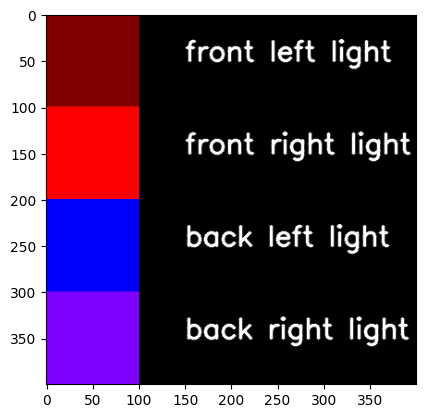

In [21]:
import matplotlib.pyplot as plt
# Create a class image
img_drawing = np.zeros((400,400,3), np.uint8)
 #fll 1
 #frl 2
 #bll 3
 #brl 4
class_color_list = [[0,0,0],[0,0,128],[0,0,255], [255, 0,0], [255,0,128]]
cv2.rectangle(img_drawing,(0,0),(100,100),(class_color_list[1]),-1)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img_drawing,'front left light',(150,50), font, 1, (255,255,255),2,cv2.LINE_AA)
cv2.rectangle(img_drawing,(0,100),(100,200),(class_color_list[2]),-1)
cv2.putText(img_drawing,'front right light',(150,150), font, 1, (255,255,255),2,cv2.LINE_AA)
cv2.rectangle(img_drawing,(0,200),(100,300),(class_color_list[3]),-1)
cv2.putText(img_drawing,'back left light',(150,250), font, 1, (255,255,255),2,cv2.LINE_AA)
cv2.rectangle(img_drawing,(0,300),(100,400),(class_color_list[4]),-1)
cv2.putText(img_drawing,'back right light',(150,350), font, 1, (255,255,255),2,cv2.LINE_AA)
#imgplot = plt.imshow(img_drawing)
imgplot = plt.imshow(img_drawing[...,::-1])

                     
plt.show()

tensor([3, 4, 3], device='cuda:0')


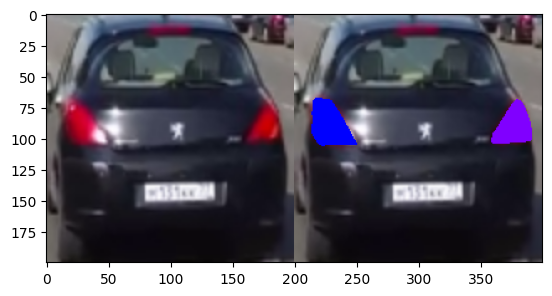

In [22]:
#show in plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


img_path = '/home/madmax/Documents/SK_articles/my datasets/cars_mine/3image.png'
images = cv2.imread(img_path)
images = cv2.resize(images, imageSize, cv2.INTER_LINEAR)
images = torch.as_tensor(images, dtype=torch.float32).unsqueeze(0)
images=images.swapaxes(1, 3).swapaxes(2, 3)
images = list(image.to(device) for image in images)
im= images[0].swapaxes(0, 2).swapaxes(0, 1).detach().cpu().numpy().astype(np.uint8)
im2 = im.copy()
class_color_list = [[0,0,0],[0,0,128],[0,0,255], [255, 0,0], [255,0,128]]
with torch.no_grad():
  pred = model(images)
print(pred[0]['labels'])
for i in range(len(pred[0]['masks'])):
    msk=pred[0]['masks'][i,0].detach().cpu().numpy()
    scr=pred[0]['scores'][i].detach().cpu().numpy()
    label = pred[0]['labels'][i].detach().cpu().numpy()
    if scr>0.5:
        im2[:,:,0][msk>0.5], im2[:,:,1][msk>0.5], im2[:,:,2][msk>0.5] = class_color_list[label] 
        

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(np.hstack([im,im2]))
                     
plt.show()


In [31]:
#saving from folder 
output_path = "/home/madmax/Documents/SK_articles/result_result/"
img_p = "/home/madmax/Documents/SK_articles/final_test/images/"
img_dirs = []
#saver_predict (img_p,model,output_path)
#for images in folder
for pth in os.listdir(img_p):   
    saver_predict_with_classes (img_p+"/"+pth, model,output_path, 0.5)


tensor([2, 4], device='cuda:0')
/home/madmax/Documents/SK_articles/result_result/image0.png
tensor([2], device='cuda:0')
/home/madmax/Documents/SK_articles/result_result/7a3f14bb-472c-4995-86aa-3d0c506cf33a.jpeg


In [30]:
#save model to onnx

images = cv2.imread('/home/madmax/Documents/SK_articles/final_test/images/image0.png')
images = cv2.resize(images, imageSize, cv2.INTER_LINEAR)
images = torch.as_tensor(images, dtype=torch.float32).unsqueeze(0)
images=images.swapaxes(1, 3).swapaxes(2, 3)
device = 'cuda'
images = list(image.to(device) for image in images)
#im= images[0].swapaxes(0, 2).swapaxes(0, 1).detach().cpu().numpy().astype(np.uint8)

x = [torch.rand(3, 200, 200), torch.rand(3, 200, 200)]
#x = [torch.rand(3, 300, 400)]
x = list(image.to(device) for image in x)
torch.onnx.export(model, x, "mask_rcnn.onnx", opset_version = 11)
print(x)
print(images)


============= Diagnostic Run torch.onnx.export version 2.0.0+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

[tensor([[[0.6519, 0.1298, 0.2991,  ..., 0.9911, 0.3429, 0.3906],
         [0.1912, 0.9891, 0.1500,  ..., 0.2915, 0.8750, 0.9322],
         [0.7153, 0.4688, 0.2180,  ..., 0.3380, 0.4040, 0.2672],
         ...,
         [0.3046, 0.3789, 0.3170,  ..., 0.9981, 0.1111, 0.2203],
         [0.0942, 0.5897, 0.7841,  ..., 0.7309, 0.9317, 0.3221],
         [0.5893, 0.2776, 0.3364,  ..., 0.2493, 0.7279, 0.5891]],

        [[0.4417, 0.5049, 0.9145,  ..., 0.8369, 0.9521, 0.5383],
         [0.8166, 0.2119, 0.3997,  ..., 0.5120, 0.6822, 0.7945],
         [0.2163, 0.3169, 0.6159,  ..., 0.0716, 0.0067, 0.2590],
         ...,
         [0.5561, 0.2158, 0.5201,  ..., 0.2502, 0.2059, 0.0653],
         [0.6353, 0.2346, 0.9485,  ..., 0.8311, 0.6539, 0.0519],
         [0.9365, 0.7644, 0.6127,  ..., 0.3483, 0.44